C:\Users\dhvan\AppData\Local\Temp\ipykernel_16224\2711957317.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


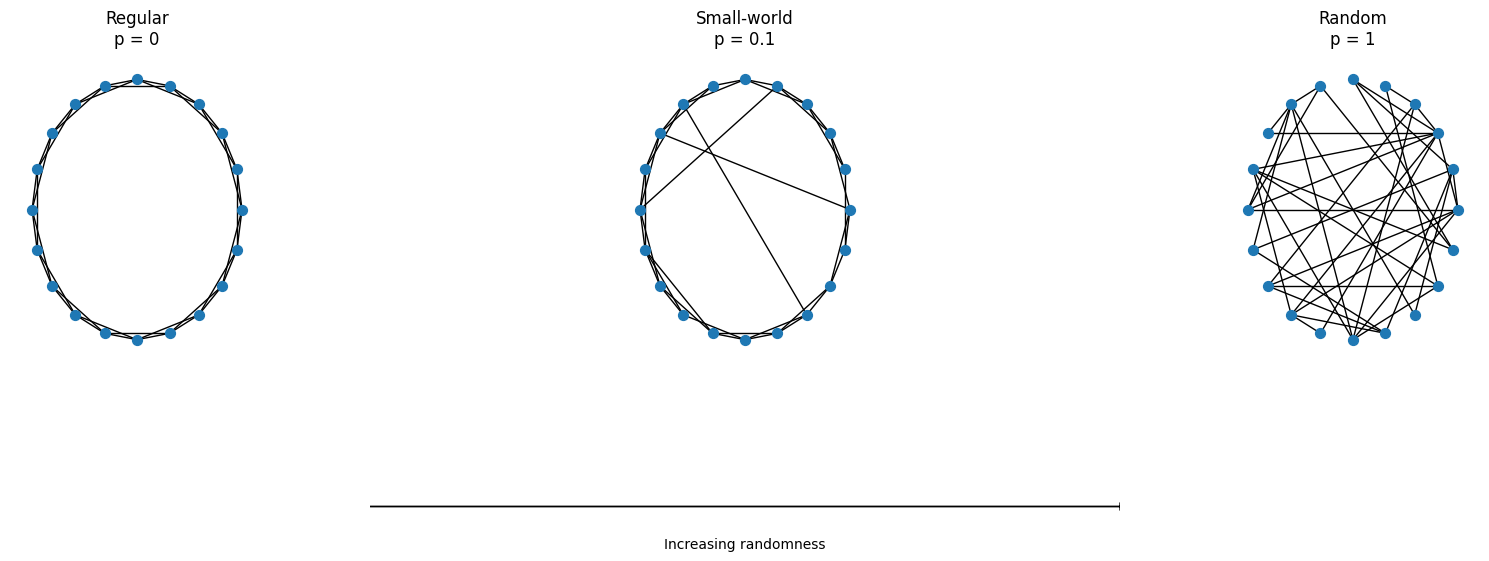

Processing p values: 100%|██████████| 20/20 [00:15<00:00,  1.26it/s]


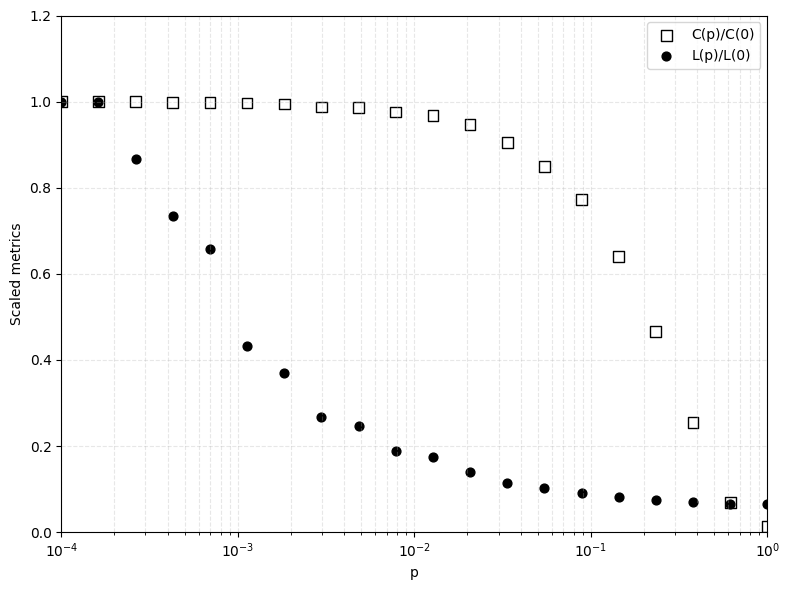

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm

def watts_strogatz_model(n, k, p):
    """
    Generate a Watts-Strogatz small-world graph.
    
    Parameters:
    n (int): Number of nodes
    k (int): Each node is connected to k nearest neighbors in ring topology (must be even)
    p (float): Probability of rewiring each edge
    
    Returns:
    G: NetworkX graph
    """
    # Create a ring lattice
    G = nx.Graph()
    nodes = list(range(n))
    G.add_nodes_from(nodes)
    
    # Connect each node to k nearest neighbors
    for i in range(n):
        for j in range(1, k//2 + 1):
            G.add_edge(i, (i+j) % n)
            G.add_edge(i, (i-j) % n)
    
    # Rewire edges with probability p
    edges = list(G.edges())
    for u, v in edges:
        if np.random.random() < p:
            # Find a new target node
            while True:
                w = np.random.randint(0, n)
                # Avoid self-loops and duplicate edges
                if w != u and not G.has_edge(u, w):
                    G.remove_edge(u, v)
                    G.add_edge(u, w)
                    break
    
    return G

def calculate_metrics(n, k, p_values):
    """
    Calculate clustering coefficient and average path length for different p values.
    
    Parameters:
    n (int): Number of nodes
    k (int): Each node is connected to k nearest neighbors in ring topology
    p_values (list): List of probabilities for rewiring
    
    Returns:
    C_ratios, L_ratios: Lists of ratios for clustering coefficient and average path length
    """
    # Generate regular lattice (p=0) to get baseline metrics
    G_regular = watts_strogatz_model(n, k, 0)
    C0 = nx.average_clustering(G_regular)
    L0 = nx.average_shortest_path_length(G_regular)
    
    C_ratios = []
    L_ratios = []
    
    for p in tqdm(p_values, desc="Processing p values"):
        G = watts_strogatz_model(n, k, p)
        C = nx.average_clustering(G)
        L = nx.average_shortest_path_length(G)
        
        C_ratios.append(C/C0)
        L_ratios.append(L/L0)
    
    return C_ratios, L_ratios

def plot_network_examples(n, k):
    """
    Plot examples of networks with different p values.
    
    Parameters:
    n (int): Number of nodes
    k (int): Each node is connected to k nearest neighbors in ring topology
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Regular network (p = 0)
    G_regular = watts_strogatz_model(n, k, 0)
    pos = nx.circular_layout(G_regular)
    nx.draw(G_regular, pos, with_labels=False, node_size=50, ax=axes[0])
    axes[0].set_title("Regular\np = 0")
    
    # Small-world network (0 < p < 1)
    G_small_world = watts_strogatz_model(n, k, 0.1)
    nx.draw(G_small_world, pos, with_labels=False, node_size=50, ax=axes[1])
    axes[1].set_title("Small-world\np = 0.1")
    
    # Random network (p = 1)
    G_random = watts_strogatz_model(n, k, 1)
    nx.draw(G_random, pos, with_labels=False, node_size=50, ax=axes[2])
    axes[2].set_title("Random\np = 1")
    
    plt.text(0.5, -0.1, "Increasing randomness", ha='center', va='center', transform=fig.transFigure)
    
    arrow_ax = fig.add_axes([0.25, -0.05, 0.5, 0.05])
    arrow_ax.arrow(0, 0.5, 1, 0, head_width=0.3, head_length=0.05, fc='k', ec='k')
    arrow_ax.set_xlim(0, 1)
    arrow_ax.set_ylim(0, 1)
    arrow_ax.axis('off')
    
    plt.tight_layout()
    plt.savefig("network_examples.png", dpi=300, bbox_inches="tight")
    plt.show()

def plot_metrics(p_values, C_ratios, L_ratios):
    """
    Plot scaled clustering coefficient and characteristic path length.
    
    Parameters:
    p_values (list): List of probabilities for rewiring
    C_ratios (list): Ratios of clustering coefficients
    L_ratios (list): Ratios of average path lengths
    """
    plt.figure(figsize=(8, 6))
    
    # Plot C(p)/C(0)
    plt.scatter(p_values, C_ratios, marker='s', s=60, facecolors='none', edgecolors='black', label="C(p)/C(0)")
    
    # Plot L(p)/L(0)
    plt.scatter(p_values, L_ratios, marker='o', s=40, color='black', label="L(p)/L(0)")
    
    plt.xscale('log')
    plt.xlim(0.0001, 1)
    plt.ylim(0, 1.2)
    plt.xlabel('p')
    plt.ylabel('Scaled metrics')
    plt.legend()
    plt.grid(True, which="both", ls="--", alpha=0.3)
    
    plt.tight_layout()
    plt.savefig("small_world_metrics.png", dpi=300)
    plt.show()

# Main execution
def main():
    # Set parameters
    n = 1000  # Number of nodes
    k = 10    # Each node connected to k nearest neighbors (must be even)
    
    # Probabilities for rewiring
    p_values = np.logspace(-4, 0, 20)
    
    # Plot network examples with a smaller n for visualization
    plot_network_examples(20, 4)
    
    # Calculate metrics
    C_ratios, L_ratios = calculate_metrics(n, k, p_values)
    
    # Plot metrics
    plot_metrics(p_values, C_ratios, L_ratios)

if __name__ == "__main__":
    main()